In [ ]:
import sklearn
import numpy as np
import pandas as pd

#Importação dos classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Importação de métricas e validação cruzada
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"
# Carregar o dataset
data = pd.read_csv(url)
print(f"{len(data)} linhas lidas")
# Mostrar o dataset
data.head()

520 linhas lidas


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
#descrição do dataset com algumas estatísticas sobre os dados
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
#transforma o gênero em binário Feminino = 0 e masculino = 1
data['Gender'] = data ['Gender'].replace({'Female':0,'Male':1 })
#transforma em binário No = 0 e Yes = 1
data['Polyuria'] = data ['Polyuria'].replace({'Yes':1,'No':0 })
data['Polydipsia'] = data ['Polydipsia'].replace({'Yes':1,'No':0 })
data['sudden weight loss'] = data ['sudden weight loss'].replace({'Yes':1,'No':0 })
data['weakness'] = data ['weakness'].replace({'Yes':1,'No':0 })
data['Polyphagia'] = data ['Polyphagia'].replace({'Yes':1,'No':0 })
data['Genital thrush'] = data ['Genital thrush'].replace({'Yes':1,'No':0 })
data['visual blurring'] = data ['visual blurring'].replace({'Yes':1,'No':0 })
data['Itching'] = data ['Itching'].replace({'Yes':1,'No':0 })
data['Irritability'] = data ['Irritability'].replace({'Yes':1,'No':0 })
data['delayed healing'] = data ['delayed healing'].replace({'Yes':1,'No':0 })
data['partial paresis'] = data ['partial paresis'].replace({'Yes':1,'No':0 })
data['muscle stiffness'] = data ['muscle stiffness'].replace({'Yes':1,'No':0 })
data['Alopecia'] = data ['Alopecia'].replace({'Yes':1,'No':0 })
data['Obesity'] = data ['Obesity'].replace({'Yes':1,'No':0 })
#Positive = 1 e Negative = 0
data['class'] =data ['class'].replace({'Positive':1, 'Negative':0 })
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [ ]:
#Declarando os atributos, para depois comparar como foram diagnosticados e testar eficiência do modelo
atributos = data.drop(columns = 'class')
atributos

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [ ]:
#Diagnóstico real dos pacientes
rotulos = data['class']
rotulos

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [ ]:
#Pré processamento
from sklearn.model_selection import train_test_split
#Dividir os dados, conjunto de teste e treino
train, test, train_labels, test_labels = train_test_split(atributos, rotulos, test_size = 0.33, random_state = 42)

Feature 0: 9.780582
Feature 1: 26.847876
Feature 2: 82.863655
Feature 3: 80.780385
Feature 4: 45.014370
Feature 5: 6.196039
Feature 6: 15.748457
Feature 7: 4.102683
Feature 8: 9.029730
Feature 9: 0.256747
Feature 10: 23.466505
Feature 11: 0.532951
Feature 12: 35.050559
Feature 13: 2.122742
Feature 14: 16.283609
Feature 15: 0.251187


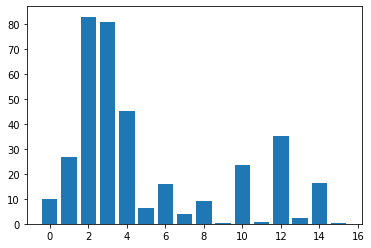

In [ ]:
#Kbest
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib import pyplot

#atribui a seleção de característica a uma variável
#score_func: teste estatístico
#chi2: dependência de cada feature com a classe, as mais propensas a independência são eliminadas
#k: número de retorno das k features mais importantes
fs = SelectKBest(score_func=chi2, k=1)
#fs obtém os recursos de treino através do fit
fs.fit(train, train_labels)
#X_train_fs recebe o novo dataset após o treino da seleção de característica
X_train_fs = fs.transform(train)
#X_test_fs recebe o novo dataset, com os devidos drops nas colunas com baixa relevância
X_testfs = fs.transform(test)

#what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.154258
Feature 1: 0.086546
Feature 2: 0.252481
Feature 3: 0.201569
Feature 4: 0.093695
Feature 5: 0.000000
Feature 6: 0.030411
Feature 7: 0.000000
Feature 8: 0.013746
Feature 9: 0.000000
Feature 10: 0.017890
Feature 11: 0.000000
Feature 12: 0.100151
Feature 13: 0.043755
Feature 14: 0.019679
Feature 15: 0.071170


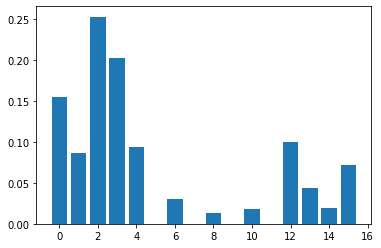

In [ ]:
#Kbest Informações Mútuas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

#atribui a seleção de característica a uma variável
#score_func: teste estatístico
#mutual_info_classif: medida da dependência mútua entre as duas variáveis
#k: número de retorno das k features mais importantes
fsm = SelectKBest(score_func=mutual_info_classif, k=13)
#fsm obtém os recursos de treino através do fit
fsm.fit(train, train_labels)
#X_train_fsm recebe o novo dataset após o treino da seleção de característica
X_train_fsm = fsm.transform(train)
#X_test_fsm recebe o novo dataset, com os devidos drops nas colunas com baixa relevância
X_testfsm = fsm.transform(test)


#what are scores for the features
for i in range(len(fsm.scores_)):
	print('Feature %d: %f' % (i, fsm.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fsm.scores_))], fsm.scores_)
pyplot.show()

In [ ]:
#RFE
#Classifica os recursos mais importantes com base na eliminação recursiva.
from sklearn.feature_selection import RFE

#Essa seleção de característica utiliza uma técnica de classificação para treinar seu modelo, nesse caso foi introduzido o SVM.svc que consiste uma linha reta que seleciona os valores que chegam mais perto de sua borda.
svc = SVC(kernel="linear", C=0.025) #Padrão kernel="linear", C=1 #resultado melhor kernel="linear", C=0.025
#estimator equivale a técnica de treinamento da seleção de característica, n-features consiste no número de colunas mais importantes para o seleção de característica
#Step se do tipo inteiro corresponde ao número de recursos para remover em cada iteração e se do tipo float corresponde a porcentagem.
rfe = RFE(estimator=svc, n_features_to_select=15, step=1)
#rfe obtém os recursos de treino através do fit
rfe.fit(train, train_labels)
#X_train_rfe recebe o novo dataset após o treino da seleção de característica
X_train_rfe = rfe.transform(train)
#X_test_fsm recebe o novo dataset, com os devidos drops nas colunas com baixa relevância
X_test_rfe = rfe.transform(test)
print(type(rfe))

print(train.columns[rfe.support_])

<class 'sklearn.feature_selection._rfe.RFE'>
Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [ ]:
#Criação de um vetor com os nomes dos Classificadores
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost","Naive Bayes", "QDA"]

In [ ]:
#Classificadores
classifiers = [
    LogisticRegression(random_state=42,  max_iter=500, n_jobs=-1), #(max_iter=300),
    KNeighborsClassifier(n_neighbors=1, n_jobs=-1),
    SVC(random_state=43, kernel='linear'), #kernel="linear", C=0.025
    SVC(gamma=0.01, C=100), #gamma=2, C=1 #backup gamma=0.01, C=100 #artigo gamma=0.1, C=1.7
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5, random_state=43), #max_depth=4, random_state=43
    RandomForestClassifier(max_depth=13, n_estimators=100, max_features=2, random_state=43, n_jobs=-1), #max_depth=4, n_estimators=300, max_features=2, random_state=43, n_jobs=-1
    MLPClassifier(alpha=1, max_iter=40000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
#Iteração dos classificadores
for name, clf in zip(names, classifiers):
  clf.fit(X_train_rfe, train_labels.ravel())
  score = clf.score(X_test_rfe, test_labels.ravel())
  print(f"Accuracy of {name} Classifier is:{score}")

Accuracy of Logistic Regression Classifier is:0.936046511627907
Accuracy of Nearest Neighbors Classifier is:0.9651162790697675
Accuracy of Linear SVM Classifier is:0.9476744186046512
Accuracy of RBF SVM Classifier is:0.9651162790697675
Accuracy of Gaussian Process Classifier is:0.9709302325581395
Accuracy of Decision Tree Classifier is:0.9593023255813954
Accuracy of Random Forest Classifier is:0.9709302325581395
Accuracy of Neural Net Classifier is:0.9651162790697675
Accuracy of AdaBoost Classifier is:0.8895348837209303
Accuracy of Naive Bayes Classifier is:0.9244186046511628
Accuracy of QDA Classifier is:0.9302325581395349
